In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from category_encoders.target_encoder import TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (GridSearchCV,KFold, train_test_split)
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('telecom_customer_churn.xlsx')

In [5]:
df.columns = ['Customer_ID', 'Gender', 'Age', 'Married', 'Number_Dependents',
       'City', 'Zip_Code', 'Latitude', 'Longtitude', 'Number_Referrals',
       'Tenure', 'Offer', 'Phone_service',
       'Average_Monthly_Long_Distance_Charges', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Average_Monthly_GB_Download',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason']

In [6]:
df.shape

(7043, 38)

In [7]:
df.isnull().sum()

Customer_ID                                 0
Gender                                      0
Age                                         0
Married                                     0
Number_Dependents                           0
City                                        0
Zip_Code                                    0
Latitude                                    0
Longtitude                                  0
Number_Referrals                            0
Tenure                                      0
Offer                                    3877
Phone_service                               0
Average_Monthly_Long_Distance_Charges     682
Multiple_Lines                            682
Internet_Service                            0
Internet_Type                            1526
Average_Monthly_GB_Download              1526
Online_Security                          1526
Online_Backup                            1526
Device_Protection_Plan                   1526
Premium_Tech_Support              

In [8]:
df.dtypes

Customer_ID                               object
Gender                                    object
Age                                        int64
Married                                   object
Number_Dependents                          int64
City                                      object
Zip_Code                                   int64
Latitude                                   int64
Longtitude                               float64
Number_Referrals                           int64
Tenure                                     int64
Offer                                     object
Phone_service                             object
Average_Monthly_Long_Distance_Charges     object
Multiple_Lines                            object
Internet_Service                          object
Internet_Type                             object
Average_Monthly_GB_Download              float64
Online_Security                           object
Online_Backup                             object
Device_Protection_Pl

In [9]:
df.head()

,Customer_ID,Gender,Age,Married,Number_Dependents,City,Zip_Code,Latitude,Longtitude,Number_Referrals,Tenure,Offer,Phone_service,Average_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Average_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34827662,-118999073.0,2,9,NaN,Yes,1900-01-01 18:39:00,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,1900-01-02 17:06:00,1900-01-24 17:03:00,0,0,1900-01-15 21:51:00,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34162515,-118203869.0,0,9,NaN,Yes,0.464583,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4,1900-01-22 14:04:00,1900-01-01 14:33:00,10,1900-01-04 00:21:00,1900-01-25 10:28:00,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33645672,-117922613.0,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,1900-01-03 01:09:00,280.85,0,0,1900-01-05 14:06:00,1900-01-17 07:45:00,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38014457,-122115432.0,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98,1237.85,0,0,361.66,1900-03-06 15:51:00,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34227846,-119079903.0,3,3,NaN,Yes,07:38:00,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,1900-01-03 11:09:00,1900-01-11 03:04:00,0,0,22:14:00,1900-01-12 01:54:00,Churned,Dissatisfaction,Network reliability


In [10]:
from tabulate import tabulate
resumo_numerico = df.describe()
resumo_numerico = df.describe()

resumo_categorico = df.describe(include='object')
print("Resumo Estatístico para Variáveis Numéricas:")
print(tabulate(resumo_numerico, headers='keys', tablefmt='pretty'))

print("\nResumo Estatístico para Variáveis Categóricas:")
print(resumo_categorico)

Resumo Estatístico para Variáveis Numéricas:
+-------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+-----------------------------+--------------------------+
|       |        Age         | Number_Dependents  |      Zip_Code      |      Latitude      |     Longtitude      |  Number_Referrals  |       Tenure       | Average_Monthly_GB_Download | Total_Extra_Data_Charges |
+-------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+-----------------------------+--------------------------+
| count |       7043.0       |       7043.0       |       7043.0       |       7043.0       |       7043.0        |       7043.0       |       7043.0       |           5517.0            |          7043.0          |
| mean  | 46.50972596904728  | 0.4686923186142269 | 93486.07056651995  | 33099734.960528184 | -

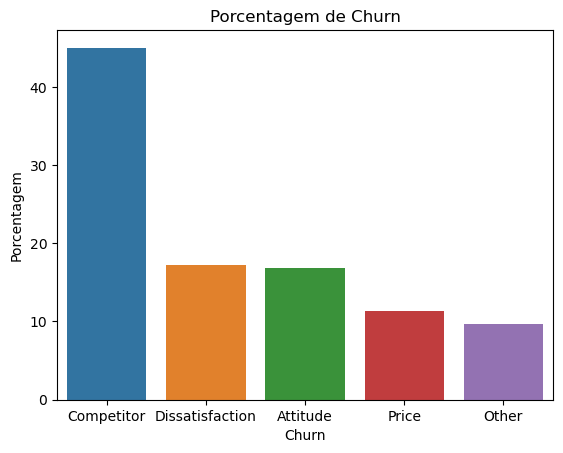

In [11]:
churn_percentages = df['Churn_Category'].value_counts(normalize=True) * 100
sns.barplot(x=churn_percentages.index, y=churn_percentages.values)
plt.title('Porcentagem de Churn')
plt.xlabel('Churn')
plt.ylabel('Porcentagem')
plt.show()

In [12]:
df['Customer_Status'] = df['Customer_Status'].replace('Joined', 0)
df['Customer_Status'] = df['Customer_Status'].replace('Churned', 1)
df['Customer_Status'] = df['Customer_Status'].replace('Stayed', 0)

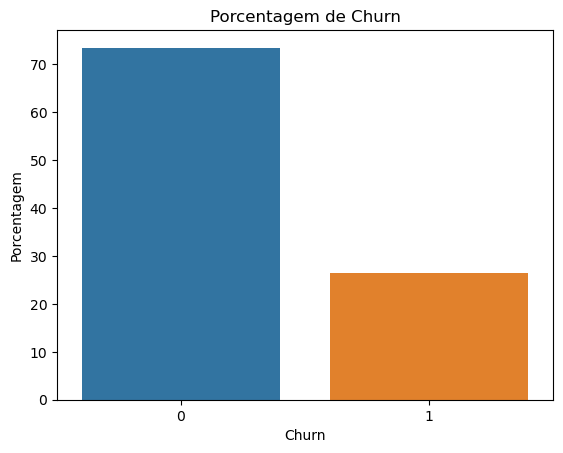

In [13]:
churn_percentages = df['Customer_Status'].value_counts(normalize=True) * 100
sns.barplot(x=churn_percentages.index, y=churn_percentages.values)
plt.title('Porcentagem de Churn')
plt.xlabel('Churn')
plt.ylabel('Porcentagem')
plt.show()

In [14]:
churn_percentages

Customer_Status
0    73.463013
1    26.536987
Name: proportion, dtype: float64

In [15]:
def padroniza (dado):
    try:
        dado = pd.to_datetime(dado).strftime('%H:%M:%S')
        dado_final = str(dado).split(':')[0] + '.' + str(dado).split(':')[1]
        return float(dado_final)
    except:
        try:
            dado_final = str(dado).split(':')[0] + '.' + str(dado).split(':')[1]
            return float(dado_final)
        except:
            return dado

In [16]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'Number_Dependents', 'City',
       'Zip_Code', 'Latitude', 'Longtitude', 'Number_Referrals', 'Tenure',
       'Offer', 'Phone_service', 'Average_Monthly_Long_Distance_Charges',
       'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Average_Monthly_GB_Download', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status',
       'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [17]:
df['Total_Revenue'] = df['Total_Revenue'].apply(padroniza)
df['Total_Long_Distance_Charges'] = df['Total_Long_Distance_Charges'].apply(padroniza)
df['Total_Extra_Data_Charges'] = df['Total_Extra_Data_Charges'].apply(padroniza)
df['Total_Refunds'] = df['Total_Refunds'].apply(padroniza)
df['Total_Charges'] = df['Total_Charges'].apply(padroniza)
df['Monthly_Charge'] = df['Monthly_Charge'].apply(padroniza)
df['Total_Charges'] = df['Total_Charges'].apply(padroniza)
df['Average_Monthly_Long_Distance_Charges'] = df['Average_Monthly_Long_Distance_Charges'].apply(padroniza)
df['Average_Monthly_Long_Distance_Charges'] = df['Average_Monthly_Long_Distance_Charges'].apply(padroniza)

In [18]:
df

,Customer_ID,Gender,Age,Married,Number_Dependents,City,Zip_Code,Latitude,Longtitude,Number_Referrals,Tenure,Offer,Phone_service,Average_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Average_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34827662,-118999073.0,2,9,NaN,Yes,0.0,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,17.06,0.0,0.0,0.0,21.51,974.81,0,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34162515,-118203869.0,0,9,NaN,Yes,0.0,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,23.59,0.0,14.33,0.0,0.21,10.28,0,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33645672,-117922613.0,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,1.09,280.85,0.0,0.0,14.06,7.45,1,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38014457,-122115432.0,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,0.0,1237.85,0.0,0.0,361.66,15.51,1,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34227846,-119079903.0,3,3,NaN,Yes,0.0,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,11.09,0.0,0.0,0.0,22.14,1.54,1,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32759327,-11699726.0,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,7.15,0.0,0.0,0.0,606.84,1349.74,0,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37734971,-120954271.0,1,22,Offer D,Yes,0.0,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,13.01,0.0,0.0,0.0,20.04,22.01,1,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39108252,-123645121.0,0,2,Offer E,Yes,0.0,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,2.03,92.75,0.0,0.0,13.24,129.99,0,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33001813,-117263628.0,5,67,Offer A,Yes,0.0,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.0,0.0,22.04,4769.69,0,NaN,NaN


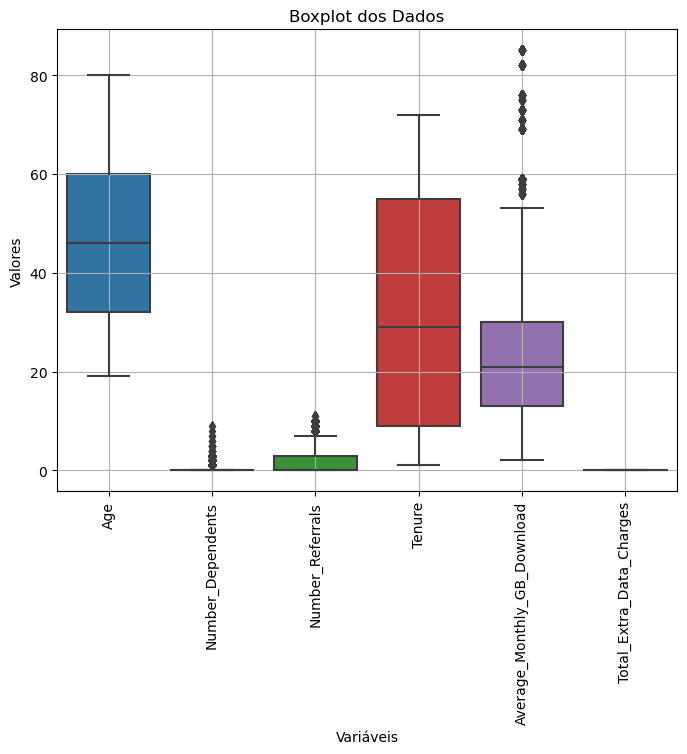

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[[ 'Age', 'Number_Dependents', 'Number_Referrals',
       'Tenure',  'Phone_service',
        'Average_Monthly_GB_Download',
        'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges']])
plt.title('Boxplot dos Dados')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

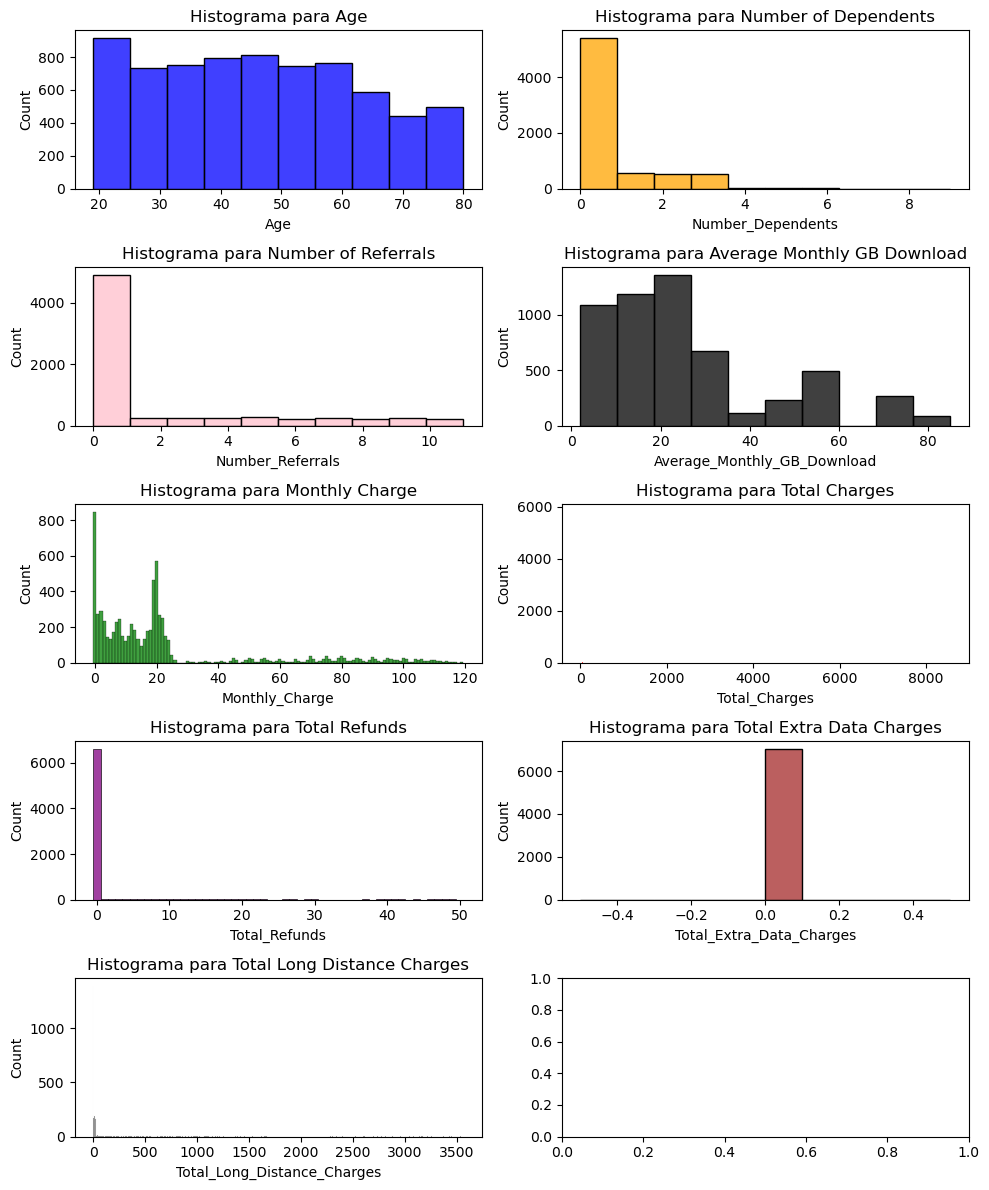

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(5, 2, figsize=(10, 12))

sns.histplot(df['Age'], bins=10, kde=False, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Histograma para Age')

sns.histplot(df['Number_Dependents'], bins=10, kde=False, color='orange', ax=axes[0, 1])
axes[0, 1].set_title('Histograma para Number of Dependents')

sns.histplot(df['Number_Referrals'], bins=10, kde=False, color='pink', ax=axes[1, 0])
axes[1, 0].set_title('Histograma para Number of Referrals')

sns.histplot(df['Average_Monthly_GB_Download'], bins=10, kde=False, color='black', ax=axes[1, 1])
axes[1, 1].set_title('Histograma para Average Monthly GB Download')

sns.histplot(df['Monthly_Charge'], bins=10, kde=False, color='green', ax=axes[2, 0])
axes[2, 0].set_title('Histograma para Monthly Charge')

sns.histplot(df['Total_Charges'], bins=10, kde=False, color='red', ax=axes[2, 1])
axes[2, 1].set_title('Histograma para Total Charges')

sns.histplot(df['Total_Refunds'], bins=10, kde=False, color='purple', ax=axes[3, 0])
axes[3, 0].set_title('Histograma para Total Refunds')

sns.histplot(df['Total_Extra_Data_Charges'], bins=10, kde=False, color='brown', ax=axes[3, 1])
axes[3, 1].set_title('Histograma para Total Extra Data Charges')

sns.histplot(df['Total_Long_Distance_Charges'], bins=4, kde=False, color='gray', ax=axes[4, 0])
axes[4, 0].set_title('Histograma para Total Long Distance Charges')

plt.tight_layout()
plt.show()

In [21]:
df.dtypes

Customer_ID                               object
Gender                                    object
Age                                        int64
Married                                   object
Number_Dependents                          int64
City                                      object
Zip_Code                                   int64
Latitude                                   int64
Longtitude                               float64
Number_Referrals                           int64
Tenure                                     int64
Offer                                     object
Phone_service                             object
Average_Monthly_Long_Distance_Charges     object
Multiple_Lines                            object
Internet_Service                          object
Internet_Type                             object
Average_Monthly_GB_Download              float64
Online_Security                           object
Online_Backup                             object
Device_Protection_Pl

In [22]:
df['Total_Revenue'] = df['Total_Revenue'].astype(float)
df['Total_Long_Distance_Charges'] = df['Total_Long_Distance_Charges'].astype(float)
df['Total_Extra_Data_Charges'] = df['Total_Extra_Data_Charges'].astype(float)
df['Total_Refunds'] = df['Total_Refunds'].astype(float)
df['Total_Charges'] = df['Total_Charges'].astype(float)
df['Monthly_Charge'] = df['Monthly_Charge'].astype(float)
df['Total_Charges'] = df['Total_Charges'].astype(float)
df['Average_Monthly_Long_Distance_Charges'] = df['Average_Monthly_Long_Distance_Charges'].astype(float)
df['Average_Monthly_Long_Distance_Charges'] = df['Average_Monthly_Long_Distance_Charges'].astype(float)

# Exploratoria Base Geral

In [23]:
tenure_bins = pd.cut(df['Tenure'], bins=4, labels=['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto'])
df['Tenure_bins'] = tenure_bins

MonthlyCharges_bins = pd.cut(df['Monthly_Charge'], bins=4, labels=['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto'])
df['Monthly_Charge_bins'] = MonthlyCharges_bins

Age_bins = pd.cut(df['Age'], bins=4, labels=['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto'])
df['Age_bins'] = MonthlyCharges_bins

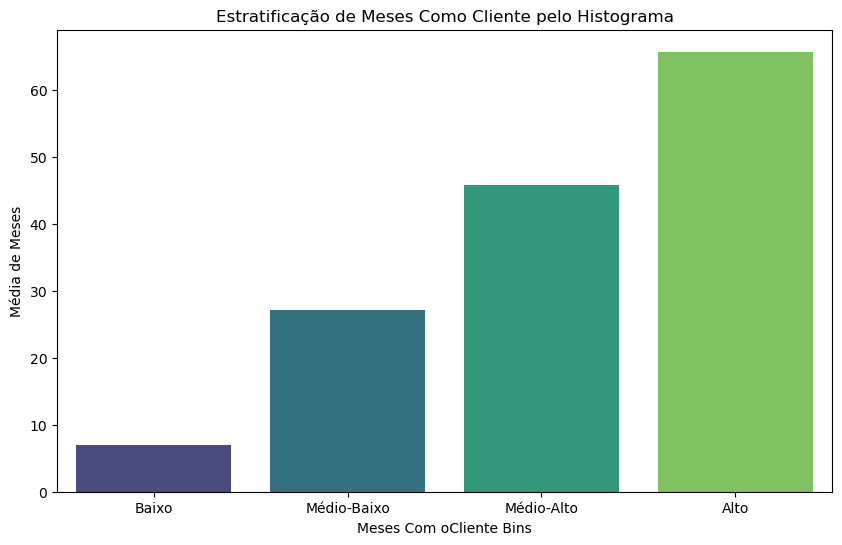

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure_bins', y='Tenure', data=df, ci=None, palette='viridis')
plt.title('Estratificação de Meses Como Cliente pelo Histograma')
plt.xlabel('Meses Com oCliente Bins')
plt.ylabel('Média de Meses')
plt.show()

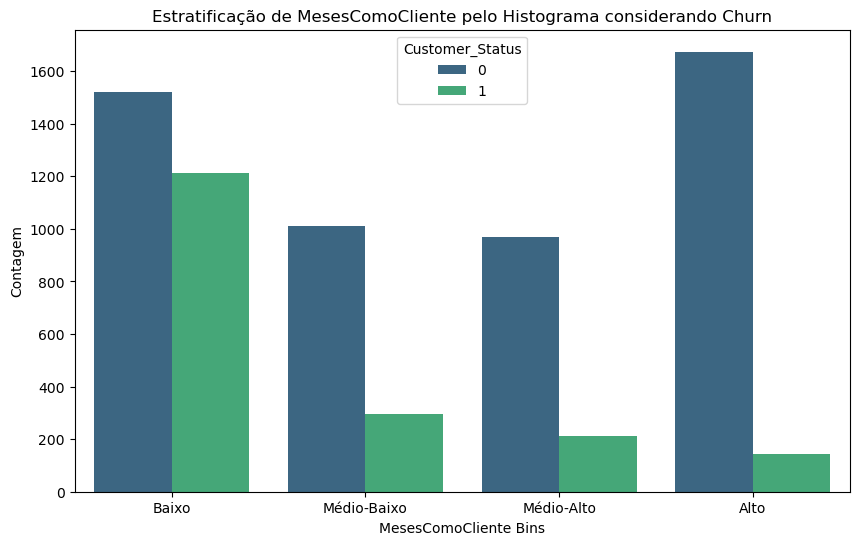

In [25]:
df['Customer_Status'] = df['Customer_Status'].astype('category')
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure_bins', hue='Customer_Status', data=df, palette='viridis')
plt.title('Estratificação de MesesComoCliente pelo Histograma considerando Churn')
plt.xlabel('MesesComoCliente Bins')
plt.ylabel('Contagem')
plt.show()

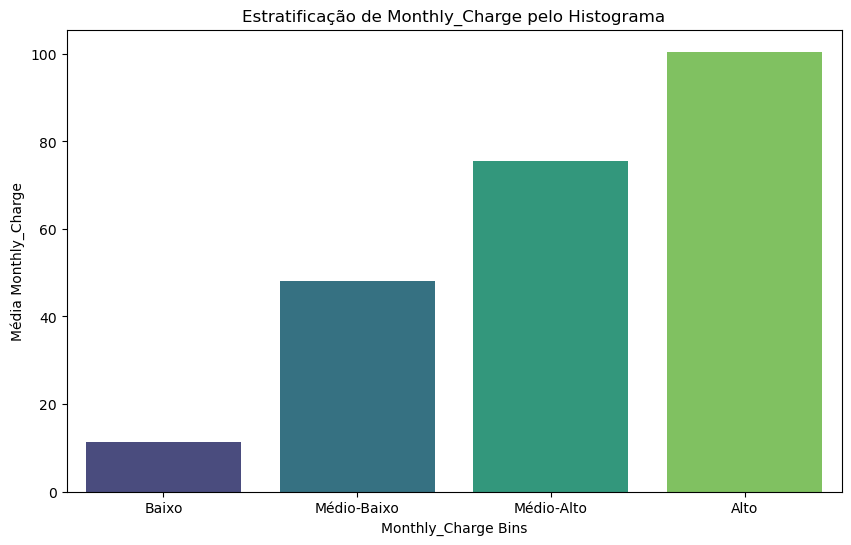

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Monthly_Charge_bins', y='Monthly_Charge', data=df, ci=None, palette='viridis')
plt.title('Estratificação de Monthly_Charge pelo Histograma')
plt.xlabel('Monthly_Charge Bins')
plt.ylabel('Média Monthly_Charge')
plt.show()

Text(0, 0.5, 'Porcentagem')

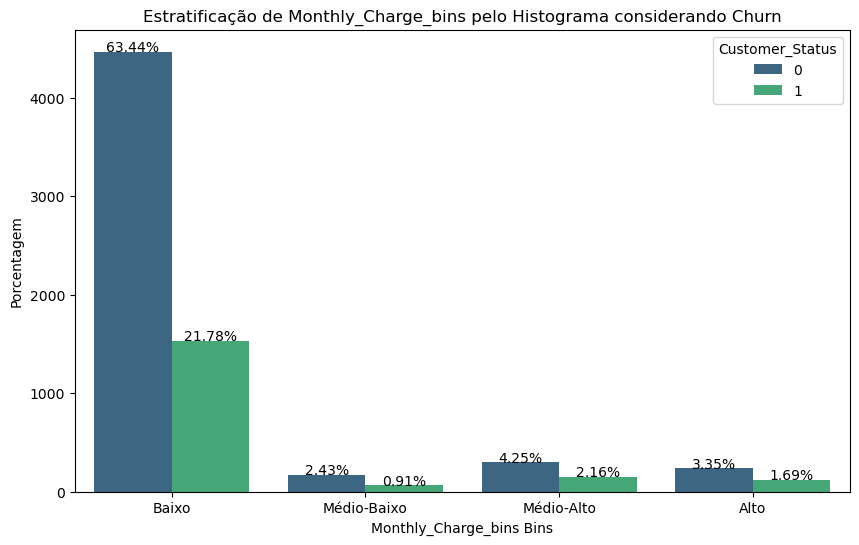

In [27]:
df['Customer_Status'] = df['Customer_Status'].astype('category')
plt.figure(figsize=(10, 6))

# Plote o gráfico de contagem com porcentagens
ax = sns.countplot(x='Monthly_Charge_bins', hue='Customer_Status', data=df, palette='viridis')

# Calcule as porcentagens
total = len(df['Monthly_Charge_bins'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

# Adicione título e rótulos aos eixos
plt.title('Estratificação de Monthly_Charge_bins pelo Histograma considerando Churn')
plt.xlabel('Monthly_Charge_bins Bins')
plt.ylabel('Porcentagem')

# Exploratoria Clientes com mais de um serviço

In [28]:
df_1 = df[(df['Phone_service'] != "No") 
                  & (df['Internet_Service'] == "Yes") 
                  & (df['Streaming_TV'] == "Yes")
                  & (df['Streaming_Movies'] == "Yes")
                  & (df['Streaming_Music'] == "Yes")].reset_index(drop=True)

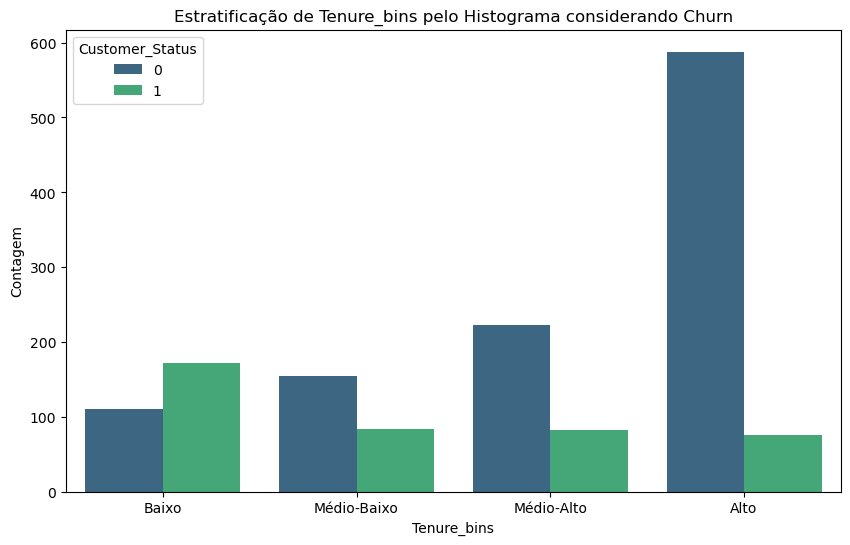

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure_bins', hue='Customer_Status', data=df_1, palette='viridis')
plt.title('Estratificação de Tenure_bins pelo Histograma considerando Churn')
plt.xlabel('Tenure_bins')
plt.ylabel('Contagem')
plt.show()

In [30]:
df.shape

(7043, 41)

In [31]:
df_1.shape

(1486, 41)

In [32]:
1486/7043

0.21098963509867955

20% dos clientes tem serviços conjugados

In [33]:
MonthlyCharges_bins = pd.cut(df_1['Monthly_Charge'], bins=4, labels=['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto'])
df_1['Monthly_Charge_bins'] = MonthlyCharges_bins

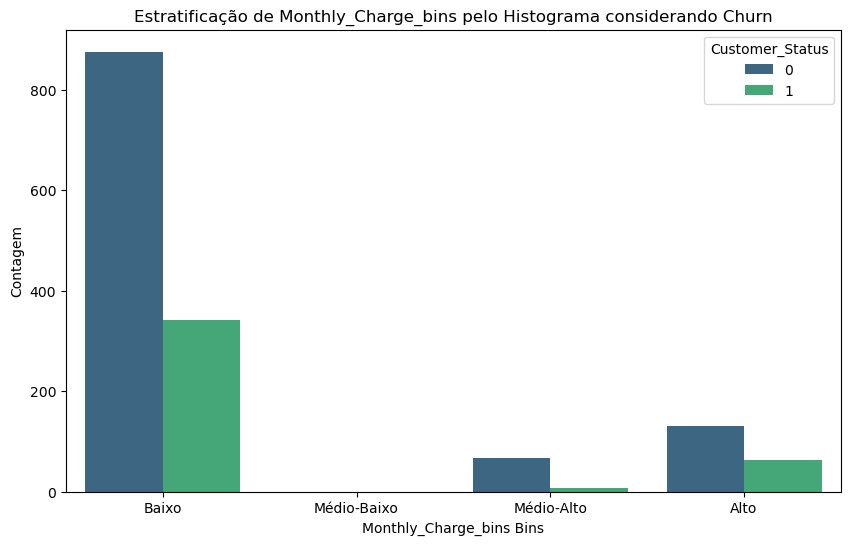

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Monthly_Charge_bins', hue='Customer_Status', data=df_1, palette='viridis')
plt.title('Estratificação de Monthly_Charge_bins pelo Histograma considerando Churn')
plt.xlabel('Monthly_Charge_bins Bins')
plt.ylabel('Contagem')
plt.show()

In [35]:
tenure = df[(df['Tenure_bins'] == "Alto")]
print(tenure.shape)

tenure = df_1[(df_1['Tenure_bins'] == "Alto")]
print(tenure.shape)

(1819, 41)
(663, 41)


In [36]:
663/1819

0.3644859813084112

In [37]:
valor_maximo = tenure['Monthly_Charge'].max()
valor_minimo = tenure['Monthly_Charge'].min()

print(f"Valor Máximo: {valor_maximo}")
print(f"Valor Mínimo: {valor_minimo}")

Valor Máximo: 118.75
Valor Mínimo: 0.0


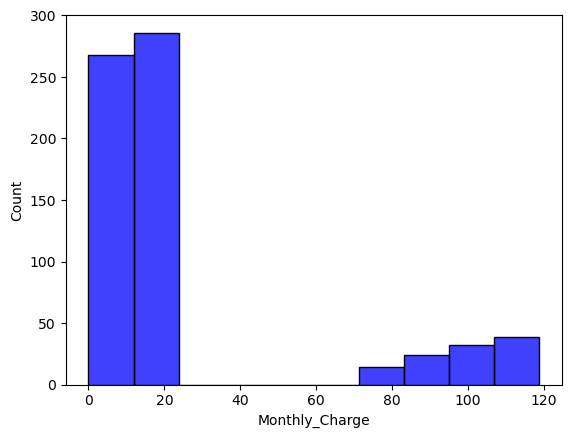

In [38]:
sns.histplot(tenure['Monthly_Charge'], bins=10, kde=False, color='blue')
plt.show()

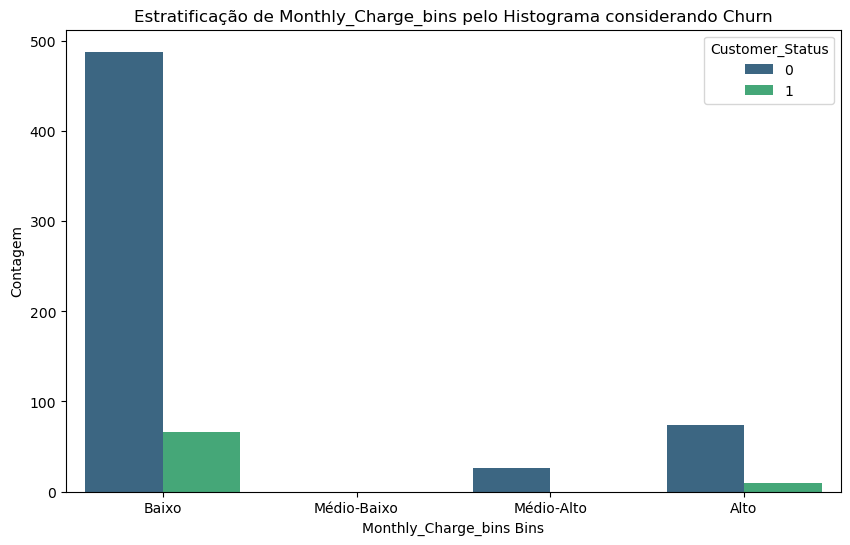

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Monthly_Charge_bins', hue='Customer_Status', data=tenure, palette='viridis')
plt.title('Estratificação de Monthly_Charge_bins pelo Histograma considerando Churn')
plt.xlabel('Monthly_Charge_bins Bins')
plt.ylabel('Contagem')
plt.show()

36% dos clientes com tempo alto tem seviços conjugados e pagam o máximo de R$118

In [40]:
tenure = df[(df['Tenure_bins'] == "Baixo")]
print(tenure.shape)

tenure = df_1[(df_1['Tenure_bins'] == "Baixo")]
print(tenure.shape)

(2734, 41)
(282, 41)


In [41]:
282/2734

0.10314557425018288

In [42]:
valor_maximo = tenure['Monthly_Charge'].max()
valor_minimo = tenure['Monthly_Charge'].min()

print(f"Valor Máximo: {valor_maximo}")
print(f"Valor Mínimo: {valor_minimo}")

Valor Máximo: 112.95
Valor Mínimo: 0.0


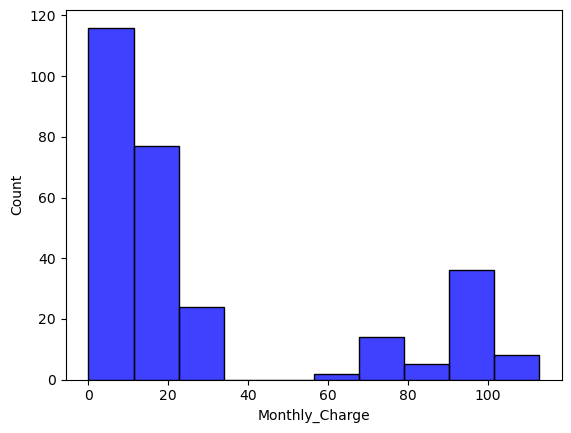

In [43]:
sns.histplot(tenure['Monthly_Charge'], bins=10, kde=False, color='blue')
plt.show()

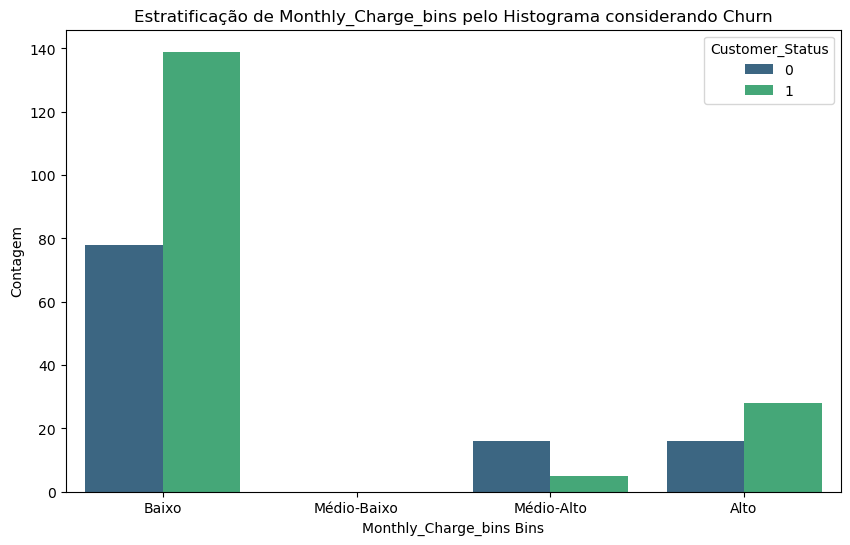

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Monthly_Charge_bins', hue='Customer_Status', data=tenure, palette='viridis')
plt.title('Estratificação de Monthly_Charge_bins pelo Histograma considerando Churn')
plt.xlabel('Monthly_Charge_bins Bins')
plt.ylabel('Contagem')
plt.show()

10% dos clientes com tempo baixo tem seviços conjugados e pagam no máximo R$112

In [45]:
tenure = df[(df['Tenure_bins'] == "Médio-Baixo")]
print(tenure.shape)

tenure = df_1[(df_1['Tenure_bins'] == "Médio-Baixo")]
print(tenure.shape)

(1308, 41)
(237, 41)


In [46]:
237/1308

0.1811926605504587

In [47]:
valor_maximo = tenure['Monthly_Charge'].max()
valor_minimo = tenure['Monthly_Charge'].min()

print(f"Valor Máximo: {valor_maximo}")
print(f"Valor Mínimo: {valor_minimo}")

Valor Máximo: 109.95
Valor Mínimo: 0.0


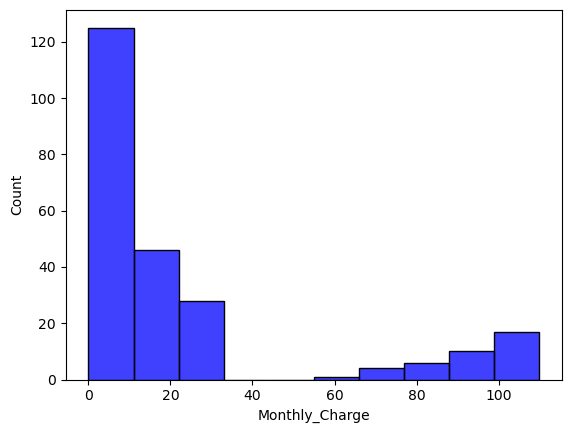

In [48]:
sns.histplot(tenure['Monthly_Charge'], bins=10, kde=False, color='blue')
plt.show()

18% dos clientes com tempo médio-baixo tem seviços conjugados e pagam no máximo R$109

In [49]:
tenure = df[(df['Tenure_bins'] == "Médio-Alto")]
print(tenure.shape)

tenure = df_1[(df_1['Tenure_bins'] == "Médio-Alto")]
print(tenure.shape)

(1182, 41)
(304, 41)


In [50]:
304/1182

0.2571912013536379

In [51]:
valor_maximo = tenure['Monthly_Charge'].max()
valor_minimo = tenure['Monthly_Charge'].min()

print(f"Valor Máximo: {valor_maximo}")
print(f"Valor Mínimo: {valor_minimo}")

Valor Máximo: 115.65
Valor Mínimo: 0.0


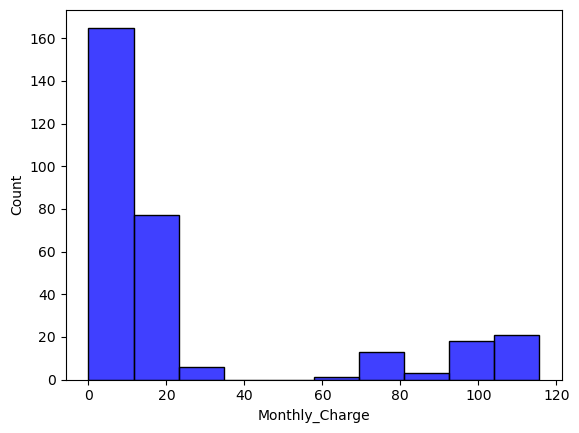

In [52]:
sns.histplot(tenure['Monthly_Charge'], bins=10, kde=False, color='blue')
plt.show()

25% dos clientes com tempo médio-alto tem seviços conjugados e pagam no máximo R$115

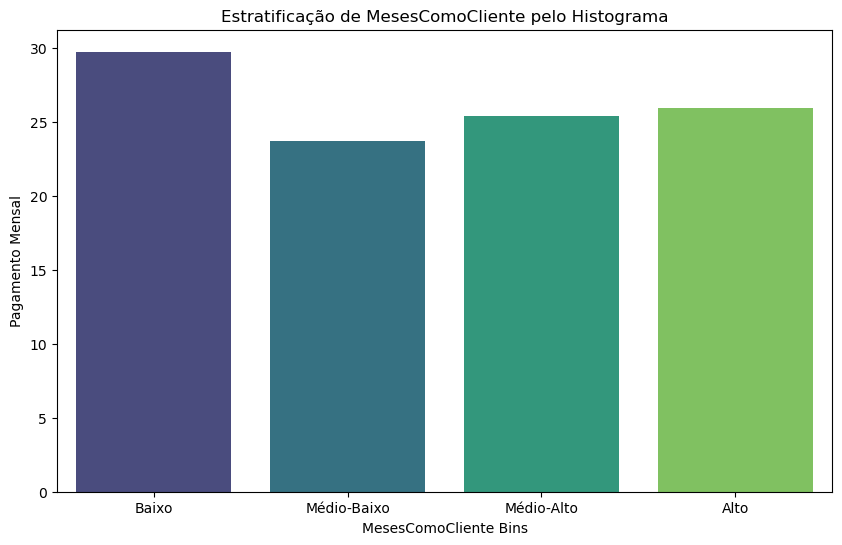

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure_bins', y='Monthly_Charge', data=df_1, ci=None, palette='viridis')
plt.title('Estratificação de MesesComoCliente pelo Histograma')
plt.xlabel('MesesComoCliente Bins')
plt.ylabel('Pagamento Mensal')
plt.show()

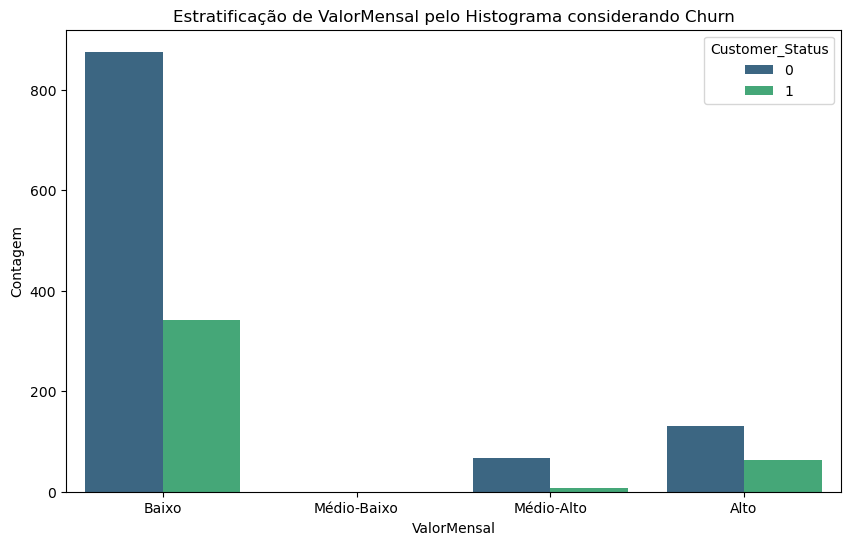

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Monthly_Charge_bins', hue='Customer_Status', data=df_1, palette='viridis')
plt.title('Estratificação de ValorMensal pelo Histograma considerando Churn')
plt.xlabel('ValorMensal')
plt.ylabel('Contagem')
plt.show()

# Exploratoria por idade

In [55]:
tenure = df[(df['Age_bins'] == "Baixo")]
print(tenure.shape)

tenure = df_1[(df_1['Age_bins'] == "Baixo")]
print(tenure.shape)

(6002, 41)
(1218, 41)


In [56]:
1218/6002

0.20293235588137287

In [57]:
tenure = df[(df['Age_bins'] == "Alto")]
print(tenure.shape)

tenure = df_1[(df_1['Age_bins'] == "Alto")]
print(tenure.shape)

(355, 41)
(194, 41)


In [58]:
194/355

0.5464788732394367

20% dos clientes mais jovens tem serviços conjugados contra 54% dos clientes mais velhos

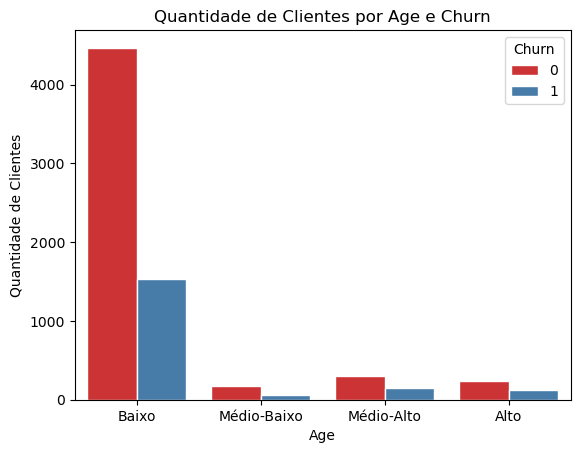

In [59]:
sns.countplot(x='Age_bins', hue='Customer_Status', data=df, palette='Set1', edgecolor='w')

# Adicione rótulos e título
plt.title('Quantidade de Clientes por Age e Churn')
plt.xlabel('Age')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', loc='upper right')

plt.show()

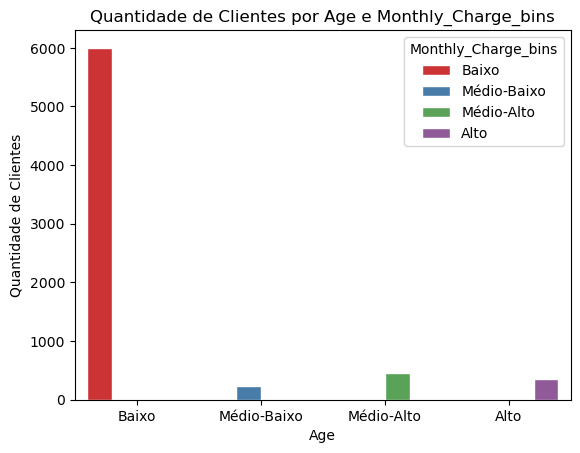

In [60]:
sns.countplot(x='Age_bins', hue='Monthly_Charge_bins', data=df, palette='Set1', edgecolor='w')

# Adicione rótulos e título
plt.title('Quantidade de Clientes por Age e Monthly_Charge_bins')
plt.xlabel('Age')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Monthly_Charge_bins', loc='upper right')

plt.show()

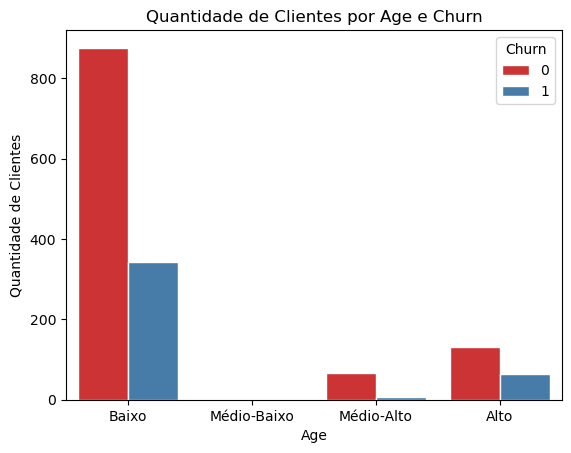

In [61]:
sns.countplot(x='Age_bins', hue='Customer_Status', data=df_1, palette='Set1', edgecolor='w')

# Adicione rótulos e título
plt.title('Quantidade de Clientes por Age e Churn')
plt.xlabel('Age')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', loc='upper right')

plt.show()

# Exploratória por forma de pagamento

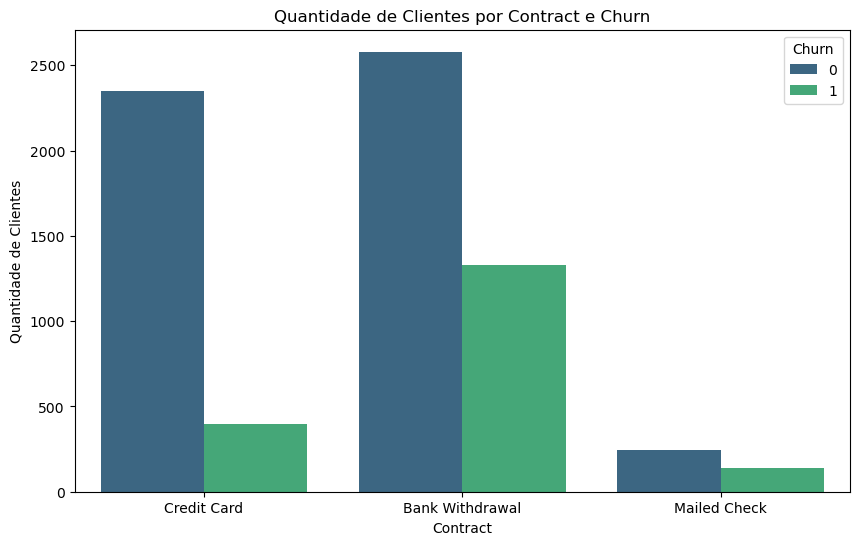

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment_Method', hue='Customer_Status', data=df, palette='viridis')

# Adicione rótulos e título
plt.title('Quantidade de Clientes por Contract e Churn')
plt.xlabel('Contract')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', loc='upper right')

plt.show()

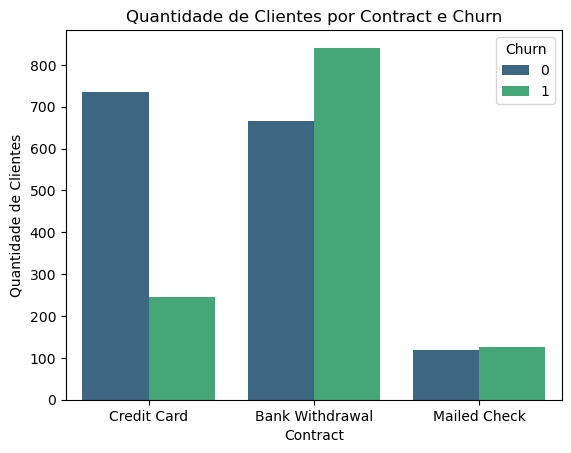

In [63]:
tenure = df[(df['Tenure_bins'] == "Baixo")]

sns.countplot(x='Payment_Method', hue='Customer_Status', data=tenure, palette='viridis')

# Adicione rótulos e título
plt.title('Quantidade de Clientes por Contract e Churn')
plt.xlabel('Contract')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', loc='upper right')

plt.show()

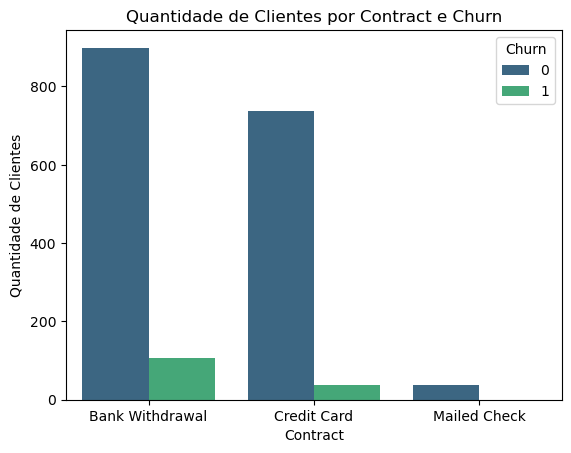

In [64]:
tenure = df[(df['Tenure_bins'] == "Alto")]

sns.countplot(x='Payment_Method', hue='Customer_Status', data=tenure, palette='viridis')

# Adicione rótulos e título
plt.title('Quantidade de Clientes por Contract e Churn')
plt.xlabel('Contract')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', loc='upper right')

plt.show()

# Exploratória por contrato

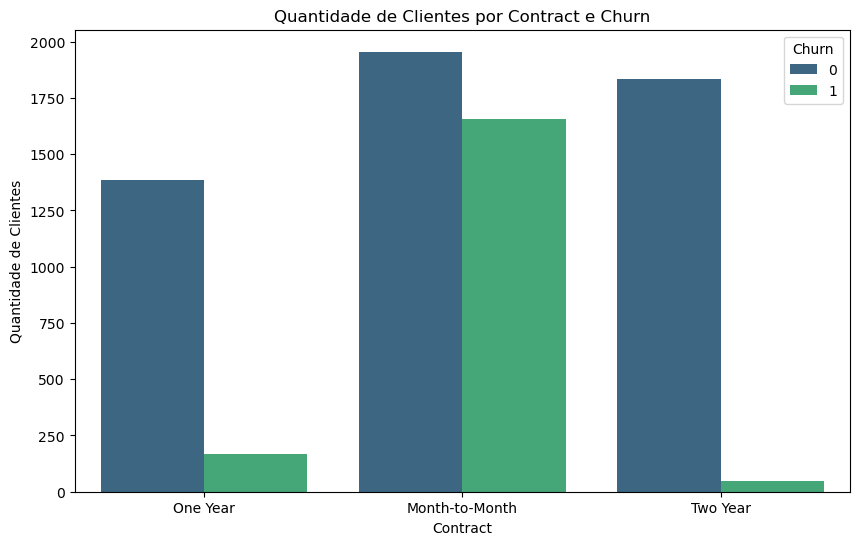

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Customer_Status', data=df, palette='viridis')

# Adicione rótulos e título
plt.title('Quantidade de Clientes por Contract e Churn')
plt.xlabel('Contract')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', loc='upper right')

plt.show()

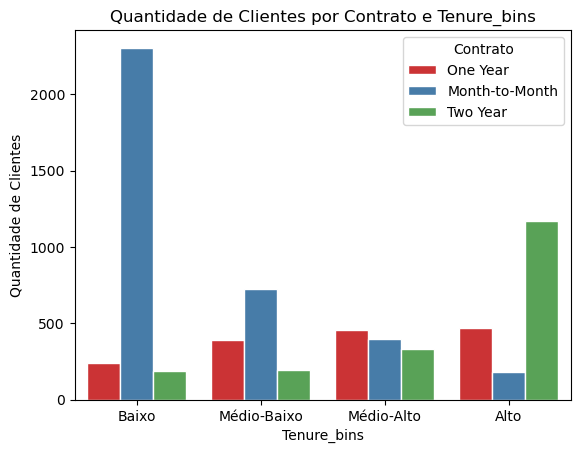

In [66]:
sns.countplot(x='Tenure_bins', hue='Contract', data=df, palette='Set1', edgecolor='w')

# Adicione rótulos e título
plt.title('Quantidade de Clientes por Contrato e Tenure_bins')
plt.xlabel('Tenure_bins')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Contrato', loc='upper right')

plt.show()

In [67]:
x = df[(df['Tenure_bins'] == "Alto")]

In [68]:
x[(x['Contract'] == "Two Year")].shape

(1169, 41)

In [69]:
1169 /1819 

0.6426608026388125

# Exploratória por serviços adicionais

In [70]:
df_3 = df[(df['Online_Security'] == "Yes") 
                  & (df['Online_Backup'] == "Yes") 
                  & (df['Device_Protection_Plan'] == "Yes")
                  & (df['Premium_Tech_Support'] == "Yes")]

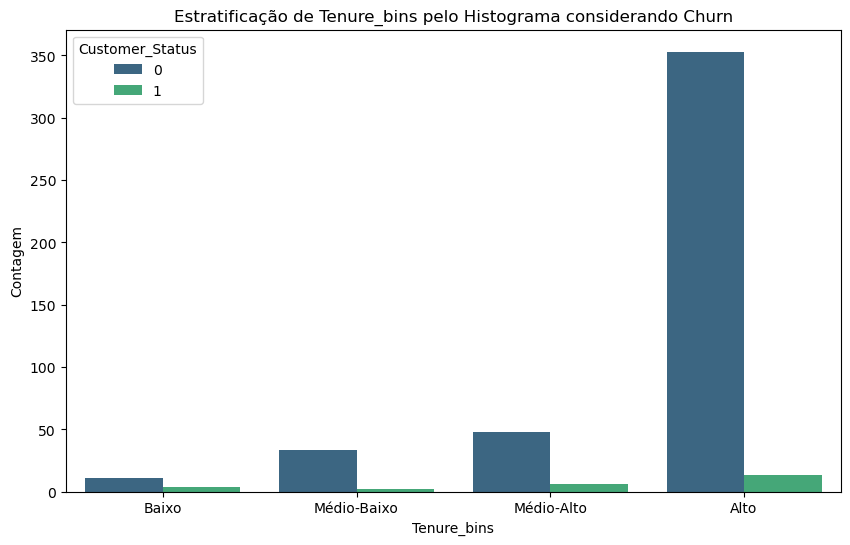

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure_bins', hue='Customer_Status', data=df_3, palette='viridis')
plt.title('Estratificação de Tenure_bins pelo Histograma considerando Churn')
plt.xlabel('Tenure_bins')
plt.ylabel('Contagem')
plt.show()

In [72]:
services = df[(df['Tenure_bins'] == "Alto")]
print(services.shape)

services = df_3[(df_3['Tenure_bins'] == "Alto")]
print(services.shape)

(1819, 41)
(366, 41)


In [73]:
366/1819

0.20120945574491478

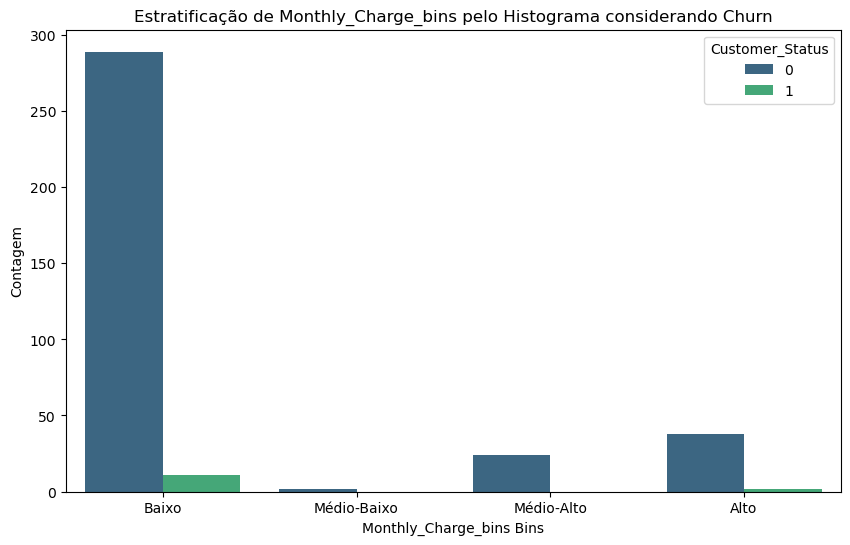

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Monthly_Charge_bins', hue='Customer_Status', data=services, palette='viridis')
plt.title('Estratificação de Monthly_Charge_bins pelo Histograma considerando Churn')
plt.xlabel('Monthly_Charge_bins Bins')
plt.ylabel('Contagem')
plt.show()

20% dos clientes mais antigos contam com serviços adicionais

In [75]:
services = df[(df['Tenure_bins'] == "Baixo")]
print(services.shape)

services = df_3[(df_3['Tenure_bins'] == "Baixo")]
print(services.shape)

(2734, 41)
(15, 41)


In [76]:
(15/2734)*100

0.548646671543526

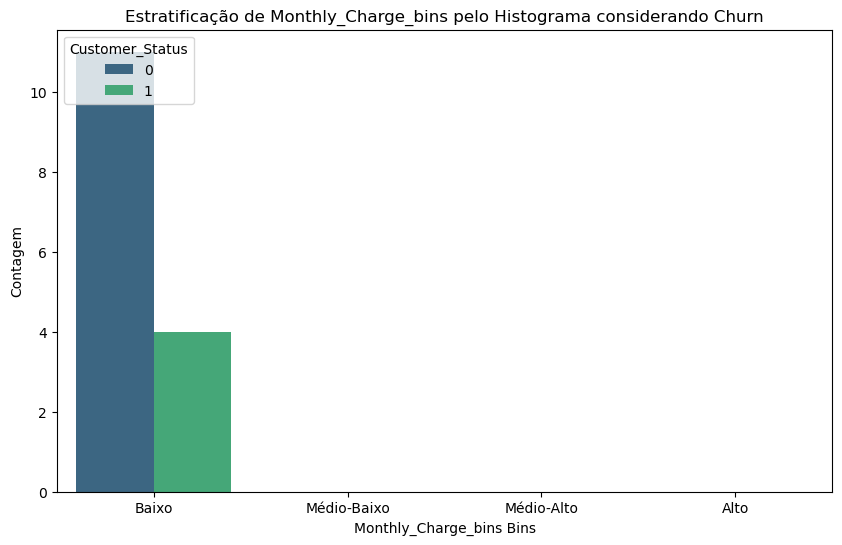

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure_bins', hue='Customer_Status', data=services, palette='viridis')
plt.title('Estratificação de Monthly_Charge_bins pelo Histograma considerando Churn')
plt.xlabel('Monthly_Charge_bins Bins')
plt.ylabel('Contagem')
plt.show()

5% dos clientes mais antigos contam com serviços adicionais

# Exploratória de motivos de churn

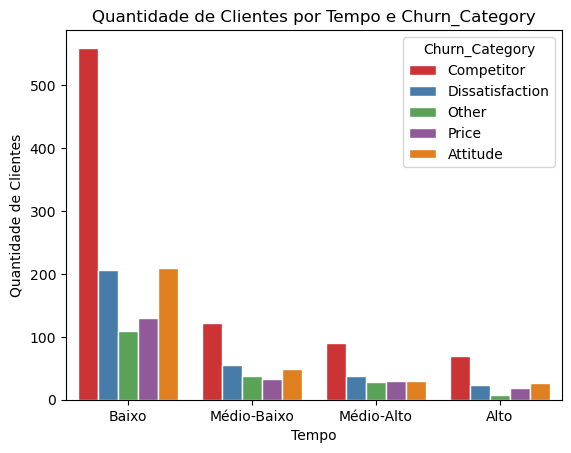

In [78]:
sns.countplot(x='Tenure_bins', hue='Churn_Category', data=df, palette='Set1', edgecolor='w')

# Adicione rótulos e título
plt.title('Quantidade de Clientes por Tempo e Churn_Category')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn_Category', loc='upper right')

plt.show()

# Exploratória por tipo de internet

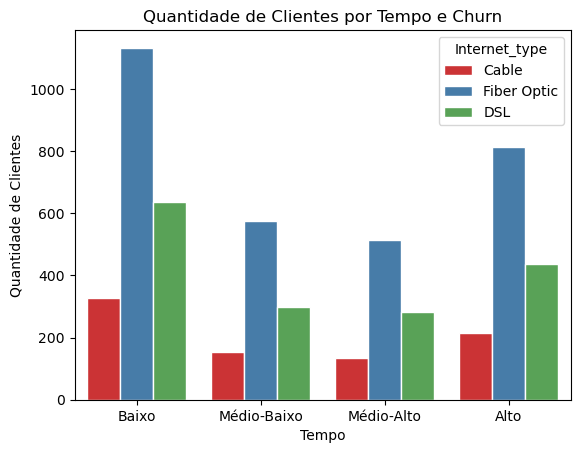

In [79]:
sns.countplot(x='Tenure_bins', hue='Internet_Type', data=df, palette='Set1', edgecolor='w')

# Adicione rótulos e título
plt.title('Quantidade de Clientes por Tempo e Churn')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Internet_type', loc='upper right')

plt.show()

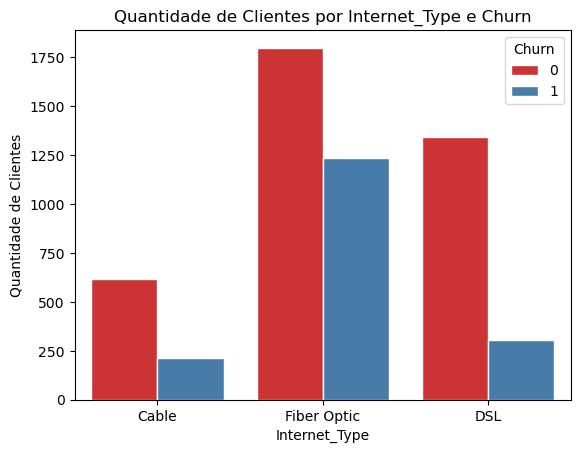

In [80]:
sns.countplot(x='Internet_Type', hue='Customer_Status', data=df, palette='Set1', edgecolor='w')

# Adicione rótulos e título
plt.title('Quantidade de Clientes por Internet_Type e Churn')
plt.xlabel('Internet_Type')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', loc='upper right')

plt.show()

# Exploratória por dados ilimitados

In [81]:
df_6 = df[(df['Unlimited_Data'] == "Yes")]

In [82]:
services = df[(df['Tenure_bins'] == "Alto")]
print(services.shape)

services = df_6[(df_6['Tenure_bins'] == "Alto")]
print(services.shape)

(1819, 41)
(1262, 41)


In [83]:
1262/1819

0.6937877954920286

In [84]:
services = df[(df['Tenure_bins'] == "Baixo")]
print(services.shape)

services = df_6[(df_6['Tenure_bins'] == "Baixo")]
print(services.shape)

(2734, 41)
(1810, 41)


In [85]:
1810/2734

0.662033650329188

In [86]:
services = df[(df['Unlimited_Data'] == "Yes")]

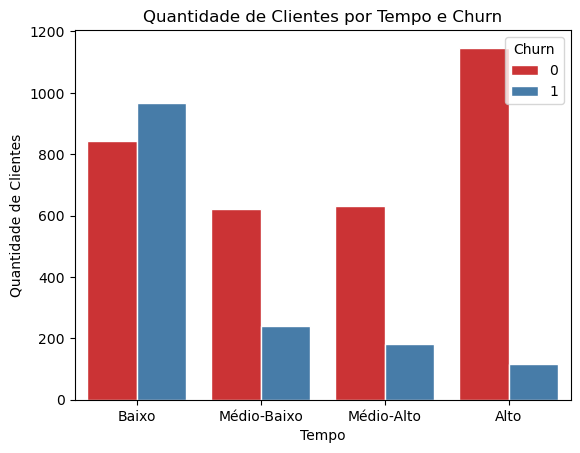

In [87]:
sns.countplot(x='Tenure_bins', hue='Customer_Status', data=services, palette='Set1', edgecolor='w')

# Adicione rótulos e título
plt.title('Quantidade de Clientes por Tempo e Churn')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', loc='upper right')

plt.show()

# Correlação entre as features

In [88]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'Number_Dependents', 'City',
       'Zip_Code', 'Latitude', 'Longtitude', 'Number_Referrals', 'Tenure',
       'Offer', 'Phone_service', 'Average_Monthly_Long_Distance_Charges',
       'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Average_Monthly_GB_Download', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status',
       'Churn_Category', 'Churn_Reason', 'Tenure_bins', 'Monthly_Charge_bins',
       'Age_bins'],
      dtype='object')

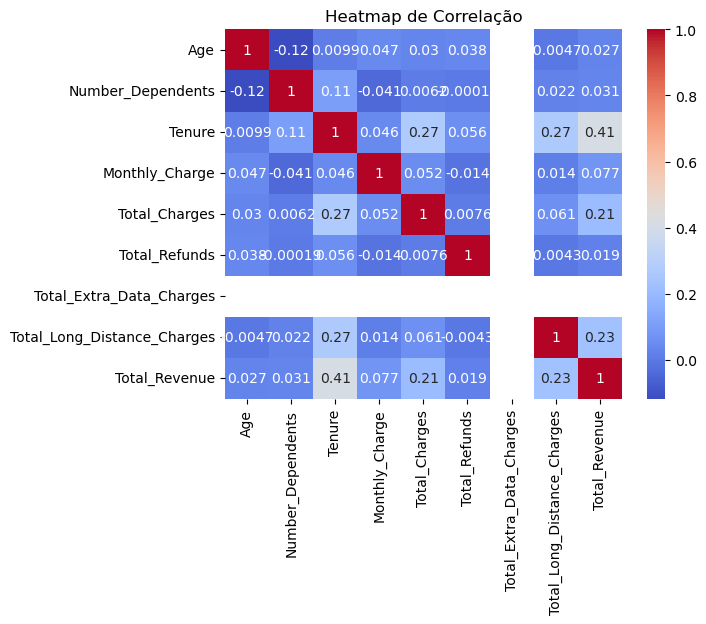

In [89]:
correlacao = df[['Age','Number_Dependents', 'Tenure', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue']].corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()

In [90]:
df.to_csv('df_pre_tratado.csv', index=False)